<a href="https://colab.research.google.com/github/biancai7/Data-Science/blob/main/An%C3%A1lise_de_dados_do_Airbnb_Istambul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Istambul, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [32]:
#importando os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [33]:
#importando os dados e criando um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/turkey/marmara/istanbul/2021-10-29/visualisations/listings.csv")



# Análise dos dados

Para entender melhor do que se trata os dados abaixo temos um dicionário das variáveis

###Dicionario de Variáveis 

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

In [34]:
#mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,1149,365,41,2017-08-04,0.54,2,363,0,NaN
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,389,30,2,2018-05-04,0.02,1,332,0,NaN
2,27831,"Large, clean, spacious apartment",120067,Defne,NaN,Besiktas,41.06590,29.00502,Entire home/apt,846,1,0,NaN,NaN,1,364,0,NaN
3,28277,Duplex Apartment 11 with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Entire home/apt,657,14,1,2021-05-15,0.18,17,328,1,NaN
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09104,29.05580,Entire home/apt,1198,3,0,NaN,NaN,1,88,0,NaN


### **Q1. Quantas variáveis e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O arquivo disponibilizado é um resumo dos dados coletados pela empresa, contando com **22539** entradas e **18** variáveis 


In [35]:
#Identificar o volume de dados
print("Entradas:\t{}".format(df.shape[0]))
print("Variaveis:\t{}".format(df.shape[1]))

Entradas:	22539
Variaveis:	18


In [36]:
#Mais informaçoes sobre os atributos e caracteristicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22539 entries, 0 to 22538
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22539 non-null  int64  
 1   name                            22514 non-null  object 
 2   host_id                         22539 non-null  int64  
 3   host_name                       22539 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   22539 non-null  object 
 6   latitude                        22539 non-null  float64
 7   longitude                       22539 non-null  float64
 8   room_type                       22539 non-null  object 
 9   price                           22539 non-null  int64  
 10  minimum_nights                  22539 non-null  int64  
 11  number_of_reviews               22539 non-null  int64  
 12  last_review                     

### **Q2. Qual a porcentagem de valores ausentes?**

Nas variáveis license e neighbourhood_group tem **100%** dos valores ausentes, enquanto reviews_per_month e last_review com **46%** de valores ausentes

In [37]:
#ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()).sort_values(ascending= False)

license                           22539
neighbourhood_group               22539
reviews_per_month                 10468
last_review                       10468
name                                 25
longitude                             0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
room_type                             0
number_of_reviews_ltm                 0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
id                                    0
dtype: int64

In [38]:
#Porcentagem de valores ausentes
df.isnull().sum().sort_values(ascending= False) / df.shape[0] *100

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  46.443942
last_review                        46.443942
name                                0.110919
longitude                           0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

Como os dados que estão ausentes não possuem informaçoes relevantes para essa análise, vou excluir-los.

In [39]:
#lidando com os valores ausentes
df = df.drop(columns= ['license', 'neighbourhood_group', 'neighbourhood_group', 'last_review'])

#excluindo as linhas ausentes da variavel name

df = df.dropna(axis=0)

Verificando os dados depois de apagar os ausentes 

In [40]:
print(df.shape)

(12070, 15)


In [41]:
df.isnull().sum().sort_values(ascending= False) / df.shape[0] *100

number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

In [42]:
#informaçōes 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12070 entries, 0 to 22447
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12070 non-null  int64  
 1   name                            12070 non-null  object 
 2   host_id                         12070 non-null  int64  
 3   host_name                       12070 non-null  object 
 4   neighbourhood                   12070 non-null  object 
 5   latitude                        12070 non-null  float64
 6   longitude                       12070 non-null  float64
 7   room_type                       12070 non-null  object 
 8   price                           12070 non-null  int64  
 9   minimum_nights                  12070 non-null  int64  
 10  number_of_reviews               12070 non-null  int64  
 11  reviews_per_month               12070 non-null  float64
 12  calculated_host_listings_count  

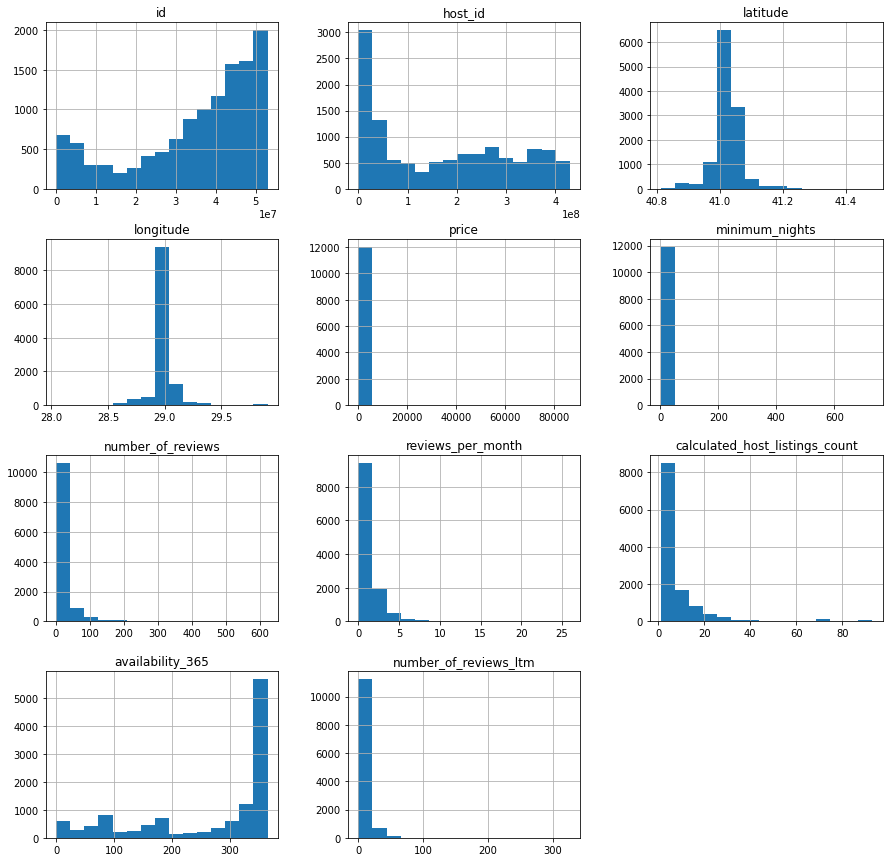

In [43]:
#plotar histogramas das variaveis numericas
df.hist(bins = 15, figsize=(15,15));

As variaveis price e minimum_nights chamam atenção pela forma que esta distribuidas, me levando a pensar que há outliers

### **Q4. Há Outliers presentes?**

Vamos utilizar o describe() para verificarmos com uma melhor exatidão

In [44]:
df[['minimum_nights', 'price']].describe()

,minimum_nights,price
count,12070.000000,12070.000000
mean,5.246396,618.378210
std,24.892283,1510.798309
min,1.000000,38.000000
25%,1.000000,278.000000
50%,2.000000,431.000000
75%,3.000000,671.000000
max,730.000000,86251.000000


Podemos ver que em **75%** dos dados na variável Minimum_nights é de 3 dias, ja o **max** é de 730

Já na variável price nos 75% é de 671, enquanto no **max** é de 86251.

O que me faz chegar a conclusão que existem outliers. Vou plotar um boxplot para ver melhor esses outliers

In [45]:
#identificando os outliers para a variável minimum_nights
q1 = df.minimum_nights.quantile(.25)
q3 = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3 - q1 

print(IQR_minimum_nights)

2.0


In [46]:
#definindo os limites
sup_m = q3 + 1.5 *IQR_minimum_nights
inf_m = q1 - 1.5 *IQR_minimum_nights

print(sup_m)
print(inf_m)

6.0
-2.0


Acima de 6 noites:
1163entradas
9.6355%


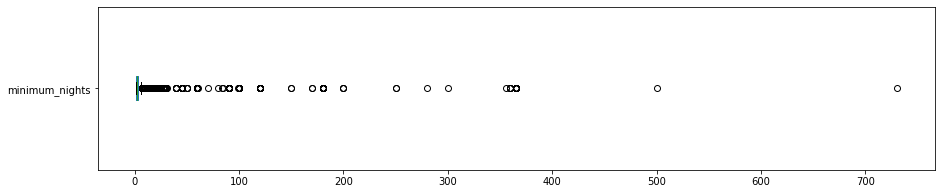

In [47]:
#plotar boxplot para a variável minimum_nights
df.minimum_nights.plot(kind='box', vert= False, figsize=(15,3))

#ver quantidade de valores acima de 6 dias para minimum_nights
print('Acima de 6 noites:')
print('{}entradas'.format(len(df[df.minimum_nights > 6])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 6]) / df.shape[0]*100)))

In [48]:
#Identificando os valores outliers com o IQR
q1_p = df.price.quantile(.25)
q3_p = df.price.quantile(.75)
IQR_p = q3_p - q1_p

print(IQR_p)

393.0


In [49]:
#definindo os limites de price
sup_p = q3_p + 1.5 * IQR_p
inf_p = q1_p - 1.5 *IQR_p

print(sup_p)
print(inf_p)

1260.5
-311.5


Acima de 1260:
863entradas:
7.15%


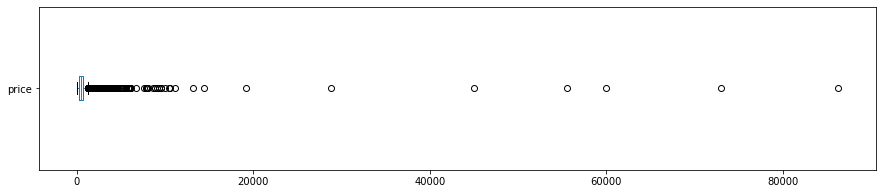

In [50]:
#plotar boxplot para price 
df.price.plot(kind="box", vert = False, figsize=(15,3))

#ver quantidade de valores acima de 1260
print("Acima de 1260:")
print('{}entradas:'.format(len(df[df.price > 1260])))
print("{:.2f}%".format((len(df[df.price > 1260]) / df.shape[0]*100)))

Como a quantidade de valores outliers é irrelevante para o estudo, vou limpar o dataset

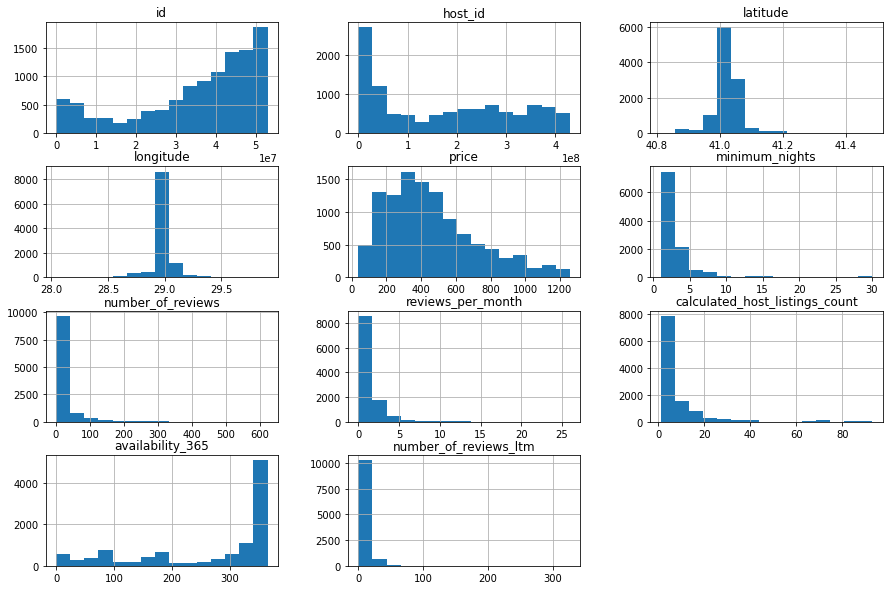

In [51]:
#limpando os outliers de minimum_nights
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 1260].index,axis=0, inplace= True)

df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0,inplace= True)

#plotar um histograma para ver o resultado da limpeza
df_clean.hist(bins = 15, figsize = (15,10));

Agora com os dados limpos, podemos extrair informações relevantes


### **Q5. Qual a media dos preços de aluguel**


In [52]:
#Mostrando a media de preços de aluguel
print('Média de preços em Istambul: Kr {:.2f}'.format(df_clean['price'].mean()))

Média de preços em Istambul: Kr 460.66


### **Q6. Qual a correlação existente entre as variaveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [31]:
#criar uma matriz de correlação 
df_clean.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.583142,0.019319,0.007622,-0.035485,-0.044030,-0.392671,0.214275,0.020651,-0.035875,0.040991
host_id,0.583142,1.000000,0.010594,-0.010126,-0.082193,-0.051720,-0.260011,0.069007,-0.051527,0.018592,-0.032505
latitude,0.019319,0.010594,1.000000,-0.159088,0.063007,-0.006615,-0.025040,-0.017121,0.033394,-0.012369,-0.022782
longitude,0.007622,-0.010126,-0.159088,1.000000,-0.001957,-0.044147,-0.011272,0.002393,-0.041253,-0.001732,0.005117
price,-0.035485,-0.082193,0.063007,-0.001957,1.000000,-0.019996,0.036878,0.013798,0.130760,0.083435,0.043841
minimum_nights,-0.044030,-0.051720,-0.006615,-0.044147,-0.019996,1.000000,-0.045039,-0.081761,-0.018195,-0.112482,-0.083395
number_of_reviews,-0.392671,-0.260011,-0.025040,-0.011272,0.036878,-0.045039,1.000000,0.329815,0.081521,0.002105,0.594128
reviews_per_month,0.214275,0.069007,-0.017121,0.002393,0.013798,-0.081761,0.329815,1.000000,0.065434,-0.017996,0.539062
calculated_host_listings_count,0.020651,-0.051527,0.033394,-0.041253,0.130760,-0.018195,0.081521,0.065434,1.000000,0.066039,0.074538
availability_365,-0.035875,0.018592,-0.012369,-0.001732,0.083435,-0.112482,0.002105,-0.017996,0.066039,1.000000,-0.019569


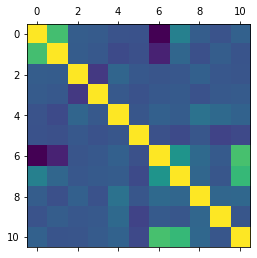

In [53]:
#criar um heatmap a partir da matriz de correlação 
plt.matshow(df_clean.corr())

### **Q7.Qual o tipo de imovel mais alugado?** 

In [54]:
#mostrar a quantidade de cada imovel disponivel 
df_clean.room_type.value_counts()

Entire home/apt    7124
Private room       3485
Hotel room          334
Shared room         105
Name: room_type, dtype: int64

In [55]:
#mostrar a porcentagem de cada imovel disponivel 
df_clean.room_type.value_counts() / df.shape[0]*100

Entire home/apt    59.022370
Private room       28.873239
Hotel room          2.767191
Shared room         0.869925
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Silivri é a localidade mais cara do dataset, com a média de preços em 712 liras turcas


In [56]:

#ver preços por bairro, na media
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

neighbourhood
Silivri          724.428571
Basaksehir       649.883117
Sile             641.632653
Adalar           581.892857
Buyukcekmece     510.380952
Beylikduzu       503.250000
Umraniye         497.494737
Beyoglu          493.590839
Sisli            484.143846
Besiktas         481.703102
Zeytinburnu      469.583333
Bagcilar         465.848000
Bakirkoy         464.500000
Fatih            464.264286
Eyup             460.652174
Catalca          446.666667
Beykoz           422.951220
Esenyurt         421.510638
Gaziosmanpasa    418.722222
Atasehir         413.281081
Avcilar          413.024691
Tuzla            407.225806
Sariyer          404.238532
Sultanbeyli      388.250000
Kartal           380.482759
Kagithane        376.000000
Bahcelievler     373.302326
Kadikoy          368.319672
Esenler          362.125000
Arnavutkoy       358.040816
Uskudar          348.627049
Maltepe          334.673611
Bayrampasa       331.777778
Pendik           325.376238
Gungoren         310.823529
Sultan

In [57]:
#ver quantidade de imoveis em Silivri
print(df_clean[df_clean.neighbourhood == "Silivri"].shape)

#ver quantidade de imoveis em Basaksehir
print(df_clean[df_clean.neighbourhood == "Basaksehir"].shape)

(14, 15)
(77, 15)


### **Gráfico baseado na latitude e longitude em relação ao preço**

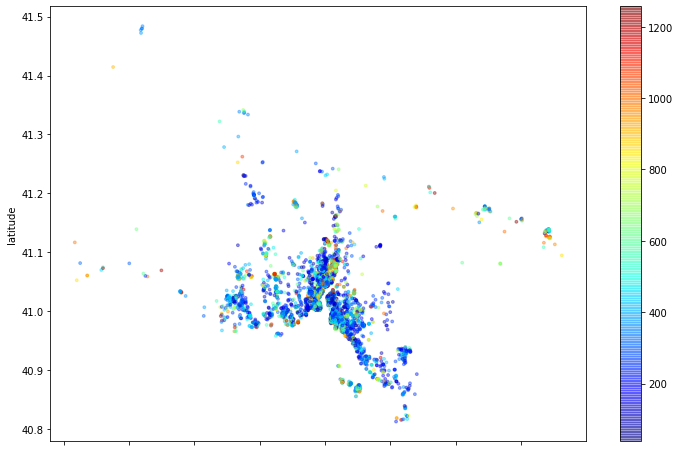

In [58]:
#plotar os imóveis pela latitude e longitude 
df_clean.plot(kind="scatter", x='longitude',y='latitude',alpha=0.4, c=df_clean['price'], 
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


In [59]:
### **Q9. Qual a media do minimo de noites 
df_clean.minimum_nights.median()

2.0

## **Conclusão** 

Com a análise feita é possivel ter informações sobre a hospedagem em Istambul, como as localidades mais caras para passar a noite, a quantidade media minima de noites, e um mapa de calor que mostra onde se encontra os imóveis e seus respectivos valores medios. 

* Foi constatado que existiam valores ausentes e outliers. Foram limpos para um melhor aproveitamento dos dados

* Silivri e Basaksehir são os bairros mais caros, com média de precos de 724 e 649 liras, respectivamente. Mas a média de alugueis pela cidade de Istambul é de 460 liras turcas
